In [38]:
import os

# Get working directory 
    # Should be the path to the notebook ! If doesn't work, set it manually
path_main = os.getcwd()
# Generalize the path to work on both Windows and Linux
path_main = path_main.replace("\\",'/')

# Locate "/2D_meshing"
main = path_main.find('/2D_meshing')
main += 11
path_main = path_main[:main]

# Set working directory to /src
path = path_main + "/src"
try: os.chdir(path)
except: print("Can't set working directory")
# Import toolsRef.py
from toolsRef import *

*Réalisé par M. Simon CADET pendant son stage de 3ème année de licence à l'Université de Poitiers sous la supervision de M. RAZAALY*

# Guide d'utilisation de « toolsRef.py »
## 1 Définitions
### 1.1 Maillage
Un maillage a pour but de diviser en sections une surface ou un volume s’apparentant à un filet. Ce programme crée le maillage de toute pièce d’une surface en connaissant certaines caractéristiques renseigner lors de l’utilisation du programme.

Le maillage réel à obtenir est appelé « maillage physique » et il est obtenu à partir d’un « maillage de référence » ou aussi appelé « computational mesh », « CPU Mesh ».

### 1.2 Maillage de référence
#### 1.2.1 Numérotation
Afin d’obtenir le maillage final, il est nécessaire de créer un maillage de référence correspondant à un carré divisé en « n-1 » sections verticales et « m-1 » sections horizontales. Chaque section se croisant, forment diverses géométries :

<ul>
    <li> Nœuds (Nodes)             </li>
    <li> Eléments (Elements)        </li>
    <li> Lignes (Edges)             </li>
</ul>

Les éléments correspondent à des surfaces à 2 dimensions composés de 4 nœuds et 4 éléments. Les lignes relient deux nœuds ensemble, revenant ainsi à un corps à une dimension. Les nœuds quant à eux se trouvent aux croisements de lignes et à chaque coin d’un élément.

Le nombre d’élément, nœud et ligne sont obtenu à partir de $n$ et $m$ :

<ul>
    <li> Nœuds : $N=n\times m$                                 </li>
    <li> Eléments : $N_{el}=(n-1)(m-1)$                        </li>
    <li> Lignes horizontales : $N_{ed_{hor}} = (n-1) \times m$ </li>
    <li> Lignes horizontales : $N_{ed_{ver}} = n \times (m-1)$ </li>
    <li> Lignes : $N_{ed} = N_{ed_{hor}} + N_{ed_{ver}}$       </li>
</ul>

Une numérotation est appliquée à chaque géométries en suivant les règles ci-dessous.

<ul>
    <li> Nœuds : </li>
</ul>
Les nœuds sont numérotés de gauche à droite, de bas en haut. La numérotation est appliquée sur chaque horizontal en partant de $0$ jusqu’à $N-1$.

<ul>
    <li> Eléments : </li>
</ul>
La numérotation des éléments suit le même principe que les nœuds : de gauche à droite, de bas en haut mais ici partant de $0$ jusqu’à $N_{el}$.

<ul>
    <li> Lignes : </li>
</ul>
Il est possible de faire la distinction entre des lignes horizontales et verticales et la numérotation s’applique en premier aux lignes horizontales puis verticales. Chaque ligne horizontale est numérotée de $0$ à $N_{ed_{hor}}-1$ et les lignes verticales de $N_{ed_{hor}}$ à $N_{ed}$. Quant à l’ordre de cette numérotation, il respecte toujours la même règle, de gauche à droite et de bas en haut.

A chaque nœud est appliqués un autre type de numérotation selon les axes horizontales et verticales : $(i,j)$, aussi appelé position. $i$ correspond à la position horizontale du nœud alors que $j$ correspond à la position verticale avec $i=0,1,2…n-1$ et $j=0,1,2…m-1$.

A partir des coordonnées $(i,j)$, il est possible d’obtenir le numéro du nœud :
$$k=i+j*n$$

Et à contrario : 
$$j=\lfloor \frac{k}{n} \rfloor$$
$$i=k-j \times n$$

#### 1.2.2 Exemple
Pour $n=5$ et $m=4$, un maillage de référence avec sa numérotation serait l’exemple ci-dessous généré à l'aide du programme.

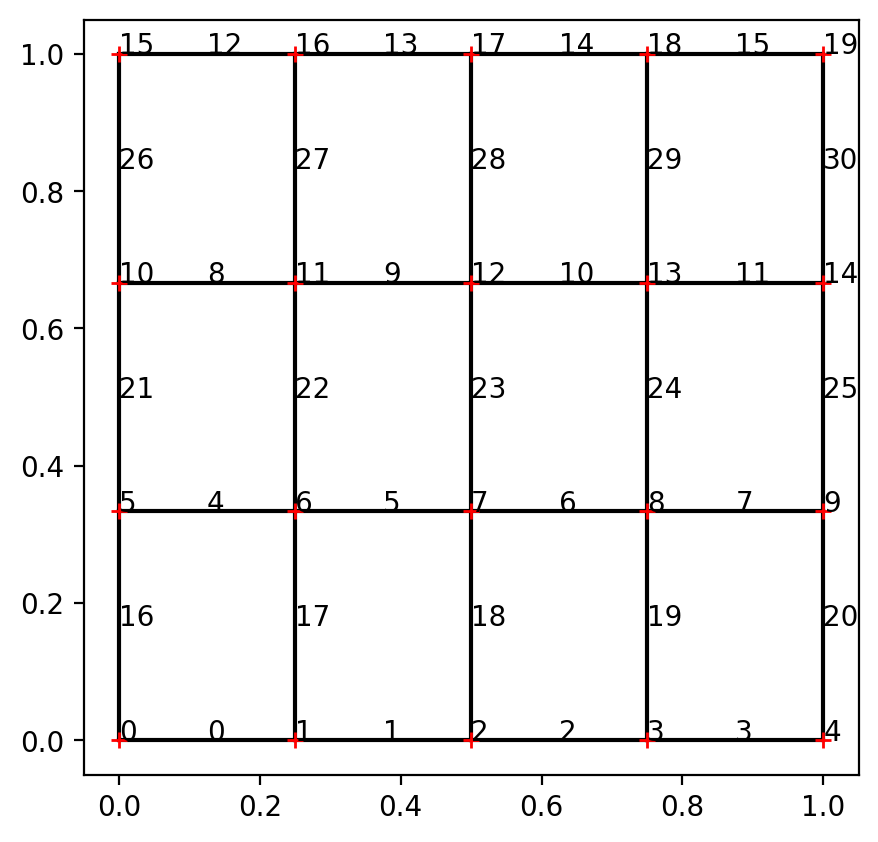

In [2]:
# Setup
n = 5; m = 4
ref = MeshCPU(n,m)
# Plot
mesh = MeshPlot(X=ref.export_X_ref(), n=n, m=m,
         nodesNames=True,
         elementsNames=False, edgesNames=True)

Un autre exemple de maillage pour des valeurs différentes de $n$ et $m$ :

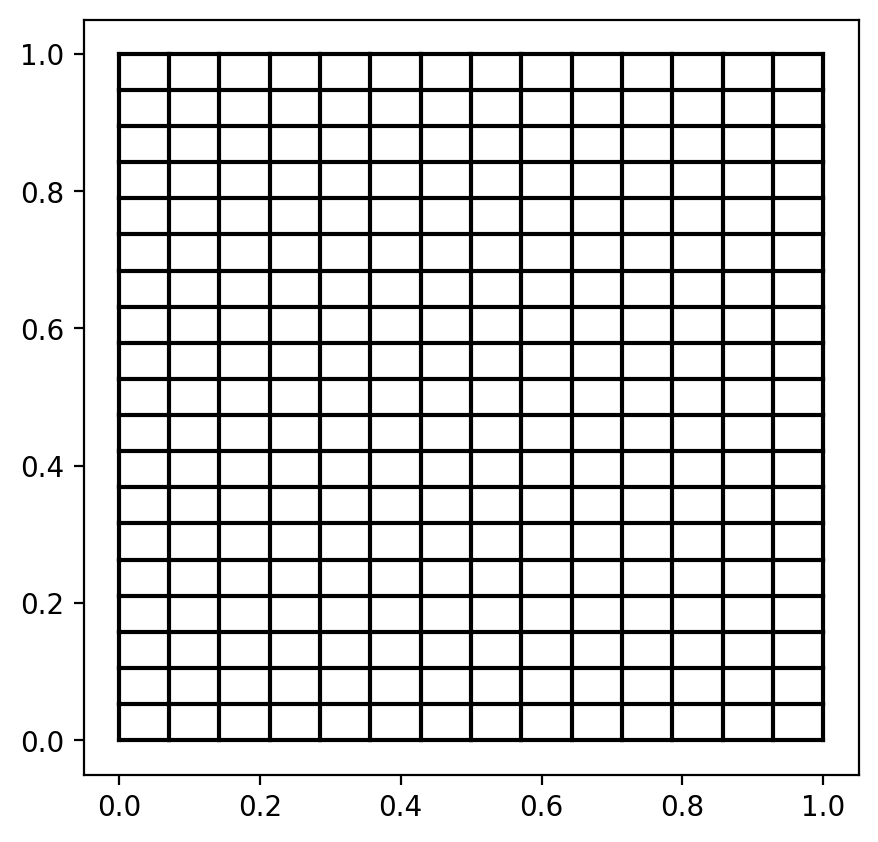

In [3]:
# Setup
n = 15; m = 20
ref = MeshCPU(n,m)
# Plot
mesh = MeshPlot(X=ref.export_X_ref(), n=n, m=m,
                nodes=False, nodesNames=False,
                elementsNames=False, edgesNames=False)

Les coordonnées $(i,j)$ de certains nœuds pour $n=5$ et $m=4$ sont :
<ul>
    <li>$k=0 \rightarrow (0,0)$  </li>
    <li>$k=8 \rightarrow (3,1)$  </li>
    <li>$k=12 \rightarrow (2,2)$ </li>
    <li>$k=19=N-1 \rightarrow (5,4) = (n,m)$</li>
</ul>

Par la suite, l’exemple de $n=5$ et $m=4$ sera couramment utilisé sur les figures où le maillage est présent. 

#### 1.2.3 Caractéristiques supplémentaires
Chaque maillage possède les mêmes dimensions suivant chaque axe, axes que nous plaçons :

<p><img src="https://raw.githubusercontent.com/SirDoggyJvla/stageL3/main/axes_r%C3%A9elles.png" 
        alt="A l'horizontal l'axe eta et à la verticale l'axe xi" 
        title="Figure maillage avec axes eta xi"
        ></p>
Les dimensions extérieures du maillage de référence sont toujours de 1 par 1 et chaque élément possède les mêmes dimensions :
<ul>
    <li> Largeur selon $\stackrel{\rightarrow}{\xi} : \dfrac{1}{n}$      </li>
    <li> Longueur selon $\stackrel{\rightarrow}{\eta} : \dfrac{1}{m}$   </li>
</ul>
A chaque coin est assigné une lettre allant de A jusqu’à D et cet ordre est toujours respecté, y compris sur le maillage physique.

Les bords du carré du maillage sont aussi nommés :
<ul>
    <li> $mapTFI_{top}$    </li>
    <li> $mapTFI_{bottom}$    </li>
    <li> $mapTFI_{left}$    </li>
    <li> $mapTFI_{right}$    </li>
</ul>
Respectivement le bord haut, bas, gauche et droite, ou aussi : $BD$, $AC$, $AB$, $CD$.

#### 1.2.4 Coordonnées réelles
Les nœuds possèdent des coordonnées de position $(i,j)$ mais aussi des coordonnées « réelles » $(\xi,\eta)$ avec $\xi∈[0,1]$, $\eta∈[0,1]$. Les coordonnées réelles d’un point quelconque $k$ sont :
$$
\xi = \dfrac{i}{n} - 1
$$

$$
\eta = \dfrac{j}{m} - 1
$$

### 1.3 Maillage physique

#### 1.3.1 Explication de la méthode employée
Le résultat final que nous souhaitons obtenir est le maillage d'une surface plane 2D, selon les propriétés choisies $n$ et $m$ et selon les bords du maillage réel que nous appelons maillage physique. La méthode utilisée est une **interpolation transfinite 2D**. 

Pour obtenir ce maillage physique, nous avons besoin de connaître des points définissant les bords de la surface, au minimum 2 bords n'étant pas relié entre eux, permettant ainsi d'avoir au total 4 points aux extrémités.

Des bords pourraient par exemple être de la forme :

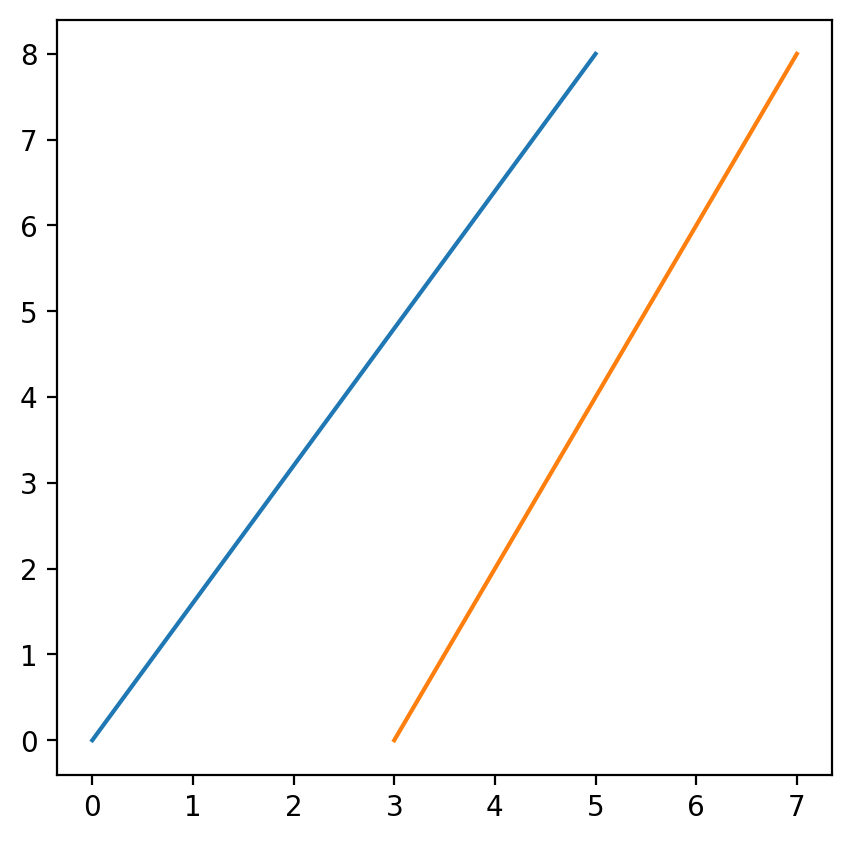

In [4]:
x1 = [0,5]; y1 = [0,8]
x2 = [3,7]; y2 = [0,8]
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

Ou les bords peuvent posséder des formes plus extravagantes :

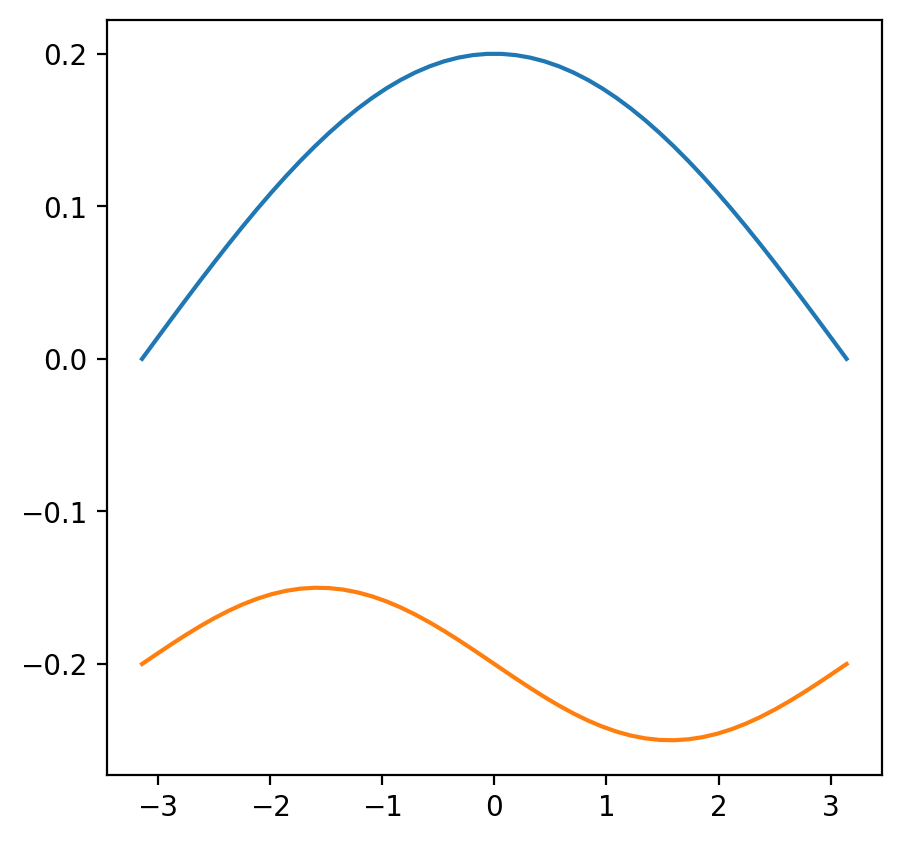

In [5]:
x1 = np.linspace(0,pi,50) ; y1 = np.sin(x1)*0.2
x2 = -np.linspace(0,2*pi,50) ; y2 = np.sin(x2)*0.05 - 0.2
plt.plot(x1*2-pi,y1)
plt.plot(x2+pi,y2)

Lorsqu'uniquement deux bords sont fournis, les 2 bords manquant sont créés en reliant les extrémités afin de former une surface fermée possédant 4 coins et 4 bords pouvant être interprétés comme un carré sur lequel des modifications ont été appliqués. Ceci décrit exactement la méthode utilisé pour déterminer le maillage physique en partant du maillage de référence puisque des déformations seront réalisés sur le maillage de référence en connaissant les bords.

#### 1.3.2 Coordonnées du maillage physique (x,y)
Les coordonnées du maillage physique sont $(x,y)$ mais peuvent aussi être écrite sous la forme suivante :
$$
(x,y) = mapTFI(\xi,\eta)
$$

Le bord $top$ peut être défini à partir de ce système de coordonnée.

Puisque $\xi$ et $\eta$ correspondent aux coordonnées du maillage de référence de $0$ à $1$ pour ces deux axes de coordonnées, nous avons pour $\eta = 1$, tous les points du bord $top$. Et comme $mapTFI$ correspond à une fonction réalisant le lien entre les coordonnées du maillage de référence et physique selon $\xi$ et $\eta$, nous avons les coordonnées du bord top de la forme suivante :
<ul>
    <li> $top = mapTFI(\xi,1)$    </li>
</ul>

En suivant cette logique pour tous les bords :
<ul>
    <li> $top = mapTFI(\xi,1)$           </li>
    <li> $bottom = mapTFI(\xi,0)$        </li>
    <li> $left = mapTFI(0,\eta)$         </li>
    <li> $right = mapTFI(1,\eta)$        </li>
</ul>

Une seconde écriture employée au sein du programme est :
<ul>
    <li> $top =$ mapTFI_x1               </li>
    <li> $bottom =$ mapTFI_x0            </li>
    <li> $left =$ mapTFI_0e              </li>
    <li> $right =$ mapTFI_1e             </li>
</ul>

#### 1.3.3 Transformation du maillage de référence au maillage physique
En connaissant les 4 bords comme expliqué précédemment, et à l'aide du maillage de référence, c'est-à-dire les coordonnées réelles de chaque point $(\xi,\eta)$, nous pouvons appliqué la formule suivante, **l'interpolation transfinite 2D**, permettant d'obtenir les coordonnées du maillage physique :
$$
(x,y) = mapTFI(\xi,\eta) = (P_{\xi} \oplus P_{\eta}) (\xi,\eta)
$$
$$
(P_{\xi} \oplus P_{\eta}) (\xi,\eta) = (1-\xi)~mapTFI(0,\eta) + \xi~mapTFI(1,\eta) + (1-\eta)~mapTFI(\xi,0) + \eta~mapTFI(\xi,1) - (1-\xi)~(1-\eta)~mapTFI(0,0) - (1-\xi)~\eta~mapTFI(0,1) - \xi~(1-\eta)~mapTFI(1,0) - \xi~\eta~mapTFI(1,1)
$$

#### 1.3.4 Particularités
Il est important à noter que puisque ce maillage est créer à partir du maillage de référence, beaucoup de particularités de celui-ci restent même après le changement. Les coordonnées de position $(i,j)$ restent inchangées et les nœuds sont reliés pareillement. Ainsi sur le maillage de référence, si le nœud $(0,0)$ est relié par une ligne avec le nœud $(3,6)$ par exemple, alors sur le maillage physique ces deux nœuds seront toujours reliés.

Le nombre d'élément et de ligne reste de même inchangés et leur numérotation suit le même principe. Cela signifie que toutes les fonctions permettant de déterminer les proximités entre objets (voir 2.1.2) sont les mêmes.

#### 1.3.5 Problématiques
Cette méthode fonctionne correctement et sans trop de problème mais lorsqu'il s'agit de réaliser le maillage d'une surface simple mais il arrive que pour des formes plus complexe les lignes se superposent. 

Un problème récurant est que les éléments ne font pas toujours la même taille avec cette méthode, certaines lignes peuvent être particulièrement longues comparés à d'autre. Ce problème est corriger en réalisant un lissage elliptique (Elliptic Smoothing).

## 2. Utilisation du programme « toolsRef.py »

### 2.1 Maillage de référence « class MeshCPU »

#### 2.1.1 Initilisation
Les outils en lien avec le maillage de référence se trouve tous dans « class MeshCPU ».

Afin de construire le maillage de référence que nous utiliserons pour le maillage physique, nous définissons en premier lieu les valeurs de $n$ et $m$ :

In [6]:
# Data, Input settings
n = 5
m = 4

Puis :

In [7]:
# CPU Mesh
ref = MeshCPU(n=n,m=m)                # or MeshCPU(n,m)

# or
ref = MeshCPU(n=n, m=m, build=False)

Par défaut $build=True$ et le programme construit le maillage automatiquement sans que l'utilisateur n'est à le demander. Cette option est présente pour des cas très spécifique où nous souhaitons que le programme ne réalise pas des calculs qui ne nous servent pas.

L'utilisation classique du programme se résume à :

In [8]:
ref = MeshCPU(n=n,m=m)

Une fois avoir réaliser ceci, le programme aura construit 3 matrices :
<ul>
    <li> $X_{ref}$ </li>
    <li> $edges$ </li>
    <li> $elem$ </li>
</ul>
Réciproquement :
<ul>
    <li> Coordonnées réelles $(\xi, \eta)$ de chaque nœud avec $X_{ref}[k-1]$ les coordonnées du nœud $k$  </li>
    <li> Les nœuds composant chaque ligne avec $edges[k-1]$ les nœuds composant la ligne $k$ </li>
    <li> Les nœuds composant chaque élément avec $elem[k-1]$ les nœuds composant l'élément $k$ </li>
</ul>
Ci-dessous, une description détaillée de ces matrices.

<ul><li> $X_{ref}$ </li></ul>
Matrice $(N,2)$

Liste des coordonnées pour chaque nœud de $0$ à $N$, avec une ligne correspondant à un nœud et une colonne correspondant à une coordonnée réelle $(\xi,\eta)$, la première colonne étant $\xi$ et la deuxième $\eta$.

Deux exemples des matrices obtenus en fonction de $n$ et $m$ :

Pour $n=5$ et $m=4$ :

In [9]:
print(ref.export_X_ref())

[[0.         0.        ]
 [0.25       0.        ]
 [0.5        0.        ]
 [0.75       0.        ]
 [1.         0.        ]
 [0.         0.33333333]
 [0.25       0.33333333]
 [0.5        0.33333333]
 [0.75       0.33333333]
 [1.         0.33333333]
 [0.         0.66666667]
 [0.25       0.66666667]
 [0.5        0.66666667]
 [0.75       0.66666667]
 [1.         0.66666667]
 [0.         1.        ]
 [0.25       1.        ]
 [0.5        1.        ]
 [0.75       1.        ]
 [1.         1.        ]]


Pour $n=6$ et $m=5$ :

In [10]:
ref.update(n=6,m=5)
print(ref.export_X_ref())

[[0.   0.  ]
 [0.2  0.  ]
 [0.4  0.  ]
 [0.6  0.  ]
 [0.8  0.  ]
 [1.   0.  ]
 [0.   0.25]
 [0.2  0.25]
 [0.4  0.25]
 [0.6  0.25]
 [0.8  0.25]
 [1.   0.25]
 [0.   0.5 ]
 [0.2  0.5 ]
 [0.4  0.5 ]
 [0.6  0.5 ]
 [0.8  0.5 ]
 [1.   0.5 ]
 [0.   0.75]
 [0.2  0.75]
 [0.4  0.75]
 [0.6  0.75]
 [0.8  0.75]
 [1.   0.75]
 [0.   1.  ]
 [0.2  1.  ]
 [0.4  1.  ]
 [0.6  1.  ]
 [0.8  1.  ]
 [1.   1.  ]]


<ul><li> $elem$ </li></ul>
Matrice $(N_{el},4)$

Liste des nœuds de chaque élément de $0$ à $N_{el}$, avec une ligne correspondant à un élément et les colonnes aux $4$ nœuds que possède l’élément. Le premier nœud correspond au nœud en bas à gauche de l’élément et les nœuds sont lu dans le sens anti horaire. Ainsi un élément $k$ correspondant à $elem[k-1]$ est de la forme :
$$
[\, BL,\, BR,\, TR,\, TL\, ]
$$

Avec $B$ pour bas (bottom), $T$ pour haut (top), $L$ pour gauche (left), $R$ pour droite (right).

In [11]:
ref.update(n=5,m=4)
print(ref.export_elem())

[[ 0  1  6  5]
 [ 1  2  7  6]
 [ 2  3  8  7]
 [ 3  4  9  8]
 [ 5  6 11 10]
 [ 6  7 12 11]
 [ 7  8 13 12]
 [ 8  9 14 13]
 [10 11 16 15]
 [11 12 17 16]
 [12 13 18 17]
 [13 14 19 18]]


<ul><li> $edges$ </li></ul>
Matrice $(N_{el},2)$

Liste des nœuds composant une ligne de $0$ à $N_{ed}$, avec les lignes correspondant aux edges et les colonnes aux nœuds. La première colonne correspond au premier nœud et la deuxième colonne au deuxième nœud avec le premier nœud dans le cas des lignes horizontales le nœud à gauche puis le deuxième le nœud à droite ou dans le cas des lignes verticales le nœud en bas est le premier puis le deuxième est en haut. Nous obtenons, en prenant l’exemple $n=2$, $m=2$ :
<p><img src="https://raw.githubusercontent.com/SirDoggyJvla/stageL3/main/edges_example.bmp" 
        alt="Noeuds BL=0, BR=1, TL=2, TR=3 et lignes du bas = 0, ligne du haut = 1, ligne à gauche = 2, ligne à droite = 3"
        title="Figure représentation du maillage n=2, m=2 avec lignes et nœuds"
        ></p>

Ci-dessous l’unique élément 0 avec ses nœuds 0,1,2,3 et ses lignes 0,1,2,3, sachant que que 0,1 sont des lignes horizontales et 2,3 verticales en respectant la numérotation détaillée précédemment.
Ainsi edges serait égale à :

In [12]:
ref.update(n=2,m=2)
print(ref.export_edges())

[[0 1]
 [2 3]
 [0 2]
 [1 3]]


Et pour notre exemple générique $n=5$, $m=4$ :

In [13]:
ref.update(n=5,m=4)
print(ref.export_edges())

[[ 0  1]
 [ 1  2]
 [ 2  3]
 [ 3  4]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [10 11]
 [11 12]
 [12 13]
 [13 14]
 [15 16]
 [16 17]
 [17 18]
 [18 19]
 [ 0  5]
 [ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]
 [ 6 11]
 [ 7 12]
 [ 8 13]
 [ 9 14]
 [10 15]
 [11 16]
 [12 17]
 [13 18]
 [14 19]]


Ces matrices correspondent à des matrices Numpy et ainsi il est possible de les manipuler comme n’importe quelle matrice Numpy avec les outils Numpy.

Ainsi afin d’obtenir une ligne spécifique $k$ d’une matrice mat, il suffit de noter :
$$
ligne_k=matrice[k]
$$

Et pour accéder à une colonne $c$ de cette ligne $k$ :
$$
var=matrice[k,c]
$$

#### 2.1.2 Liste de chaque corps
Nous utilisons ici la fonction $listAround(forEach=,get=)$. Cette fonction permet d’obtenir les corps entourant un autre sous forme de matrice, comme les éléments entourant tous les nœuds ou encore les lignes entourant les éléments.

Ainsi en entrée se trouvent deux variables forEach et get avec chacune différentes possibilités. Et par la suite nous nous réfererrons à l'aide de $forEach$ au corps renseigné dans cette entrée et même principe pour $get$.
$$
liste= A.listAround(forEach=,get=)
$$

Chaque entrée suit la logique suivante: pour chaque ... ($forEach$), donné ... ($get$).
Il existe $3$ choix au format "string" :
<ul>
    <li> $'Nodes'$        </li>
    <li> $'Elements'$     </li>
    <li> $'Edges'$        </li>
</ul>

Dans certains cas, il est aussi possible d'avoir $None$, qui est la valeur par défaut. Selon la combinaison choisi, le résultat peut être différent des autres mais il s'agit toujours de réaliser une énumération des $get$ autour de chaque $forEach$.

Dans certains cas le résultat renvoyé peut-être de la forme d'une matrice car le nombre de $get$ autour des $forEach$ reste le même mais parfois un corps $forEach$ peut être composé d'un nombre variant par exemple de 2 à 6 $get$.

La même logique d'énumération est appliqué à tous les exemples: le premier $get$ se situe à gauche, et s'il n'existe pas de corps à gauche directement, alors il se situe en bas à gauche, puis les corps sont lu dans le sens anti horaire.

Les valeurs sont stocké sous forme d'integer puisque ce ne sont que des entiers.

Ci-dessous les combinaisons possibles avec le nom des variables locales.
<p><img src="https://raw.githubusercontent.com/SirDoggyJvla/stageL3/main/tableau2.png" 
        alt="Tableau avec combinaisons possibles pour listAround" 
        title="Tableau avec combinaisons possibles pour listAround"
        width = 500
        ></p>



Pour notre exemple générique $n=5$ et $m=4$, les résultats des différentes combinaisons possibles sont les suivants.

Pour rappel, voici notre maillage de référence $n=5$ et $m=4$ :

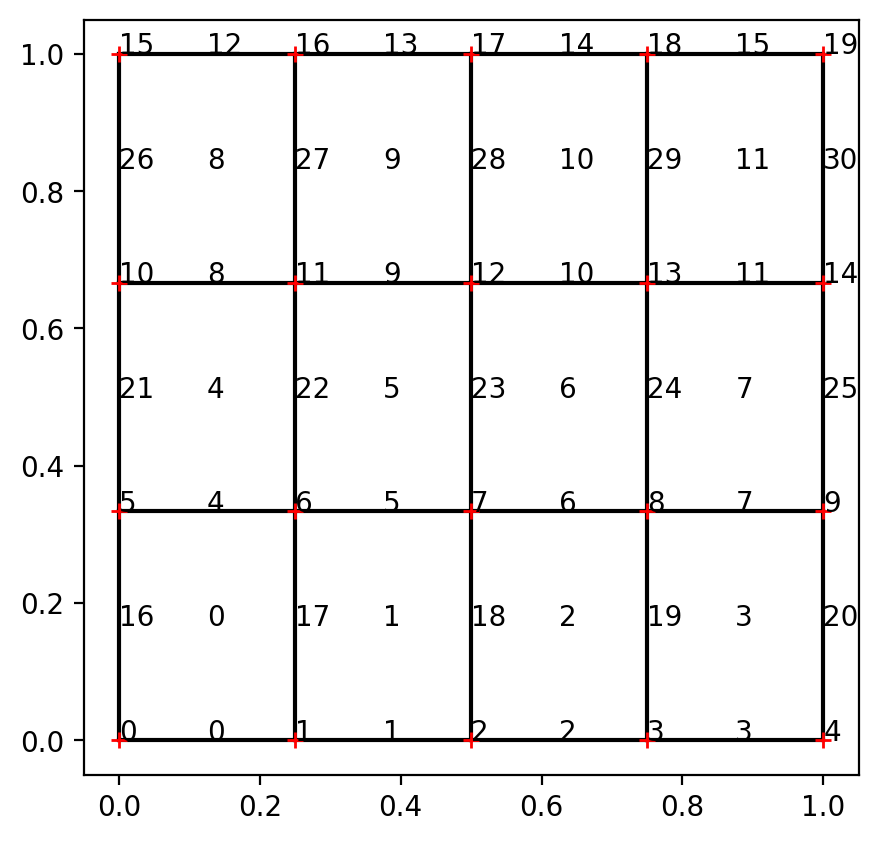

In [14]:
n = 5 ; m = 4
ref.update(n=n,m=m)
# Plot
mesh = MeshPlot(X=ref.export_X_ref(), n=n, m=m,
                nodes=True, nodesNames=True,
                elementsNames=True, edgesNames=True)

<ul><li> $forEach=' Nodes',get='Nodes'$ </li></ul>

In [15]:
print(ref.listAround(forEach='Nodes',get='Nodes'))

[[1, 5], [0, 2, 6], [1, 3, 7], [2, 4, 8], [3, 9], [0, 6, 10], [5, 1, 7, 11], [6, 2, 8, 12], [7, 3, 9, 13], [8, 4, 14], [5, 11, 15], [10, 6, 12, 16], [11, 7, 13, 17], [12, 8, 14, 18], [13, 9, 19], [10, 16], [15, 11, 17], [16, 12, 18], [17, 13, 19], [18, 14]]


<ul><li> $forEach=' Nodes',get='Edges'$ </li></ul>

In [16]:
print(ref.listAround(forEach='Nodes',get='Edges'))

[[0, 16], [0, 1, 17], [1, 2, 18], [2, 3, 19], [3, 20], [16, 4, 21], [4, 17, 5, 22], [5, 18, 6, 23], [6, 19, 7, 24], [7, 20, 25], [21, 8, 26], [8, 22, 9, 27], [9, 23, 10, 28], [10, 24, 11, 29], [11, 25, 30], [26, 12], [12, 27, 13], [13, 28, 14], [14, 29, 15], [15, 30]]


<ul><li> $forEach=' Nodes',get='Elements'$ </li></ul>

In [17]:
print(ref.listAround(forEach='Nodes',get='Elements'))

[[0], [0, 1], [1, 2], [2, 3], [3], [0, 4], [0, 1, 5, 4], [1, 2, 6, 5], [2, 3, 7, 6], [3, 7], [4, 8], [4, 5, 9, 8], [5, 6, 10, 9], [6, 7, 11, 10], [7, 11], [8], [8, 9], [9, 10], [10, 11], [11]]


<ul><li> $forEach='Edges',get='Elements'$ </li></ul>

In [18]:
print(ref.listAround(forEach='Edges',get='Elements'))

[[1, 0], [2, 1, 0], [3, 2, 1], [3, 2], [0, 1, 5, 4], [0, 1, 2, 6, 5, 4], [1, 2, 3, 7, 6, 5], [2, 3, 7, 6], [4, 5, 9, 8], [4, 5, 6, 10, 9, 8], [5, 6, 7, 11, 10, 9], [6, 7, 11, 10], [8, 9], [8, 9, 10], [9, 10, 11], [10, 11], [0, 4], [1, 5, 4, 0], [2, 6, 5, 1], [3, 7, 6, 2], [7, 3], [0, 4, 8], [0, 1, 5, 9, 8, 4], [1, 2, 6, 10, 9, 5], [2, 3, 7, 11, 10, 6], [3, 11, 7], [4, 8], [4, 5, 9, 8], [5, 6, 10, 9], [6, 7, 11, 10], [7, 11]]


<ul><li> $forEach='Elements',get='Edges'$ </li></ul>

In [19]:
print(ref.listAround(forEach='Elements',get='Edges'))

[[16  0 17  4]
 [17  1 18  5]
 [18  2 19  6]
 [19  3 20  7]
 [21  4 22  8]
 [22  5 23  9]
 [23  6 24 10]
 [24  7 25 11]
 [26  8 27 12]
 [27  9 28 13]
 [28 10 29 14]
 [29 11 30 15]]


<ul><li> $forEach='Elements',get='Elements'$ </li></ul>

In [20]:
print(ref.listAround(forEach='Elements',get='Elements'))

[[1, 5, 4], [0, 2, 6, 5, 4], [1, 3, 7, 6, 5], [2, 7, 6], [0, 1, 5, 9, 8], [4, 0, 1, 2, 6, 10, 9, 8], [5, 1, 2, 3, 7, 11, 10, 9], [6, 2, 3, 11, 10], [4, 5, 9], [8, 4, 5, 6, 10], [9, 5, 6, 7, 11], [10, 6, 7]]


Il y a une combinaison finale et spéciale qui permet de renvoyer une liste de $0$ à $N_{ed}$ permettant de connaître la position d'une ligne sur la maillage. Il existe 5 positions différentes pour les lignes : top, bottom, left, right, interior.

Lorsque la ligne se trouve sur le bord haut (top), alors sa position est top, mais si elle ne se trouve sur aucun bord alors son type est "interior". En utilisant la fonction précédente $listAround(forEach=,get=)$, nous pouvons obtenir cette liste. De plus cette liste est généré automatiquement avec les lignes dans la fonction $generateEdges()$ donc en regénérant les lignes après changer la valeur de $n$ ou $m$ par exemple, la liste est automatiquement redéfinie.

<ul><li> $forEach='Edges',get='Type'$ </li></ul>

In [21]:
print(ref.listAround(forEach='Edges',get='Type'))

['bottom', 'bottom', 'bottom', 'bottom', 'interior', 'interior', 'interior', 'interior', 'interior', 'interior', 'interior', 'interior', 'top', 'top', 'top', 'top', 'left', 'interior', 'interior', 'interior', 'right', 'left', 'interior', 'interior', 'interior', 'right', 'left', 'interior', 'interior', 'interior', 'right']


#### 2.1.3	Récupération les propriétés d'une instance
A l’aide de certaines fonctions, il est possible de récupérer les données calculées à n'importe quel moment ainsi que les propriétés qui définissent l'instance ($n$, $m$ ...). Les fonctions suivantes sont utilisables dans les classes $MeshCPU()$ et $Mesh()$ :
<ul>
    <li> Récupérer $n$ et $m$ : export_n() ; export_m()                                 </li>
    <li> Récupérer $N$, $N_{ed}$ et $N_{el}$ : export_N ; export_N_ed ; export_N_el     </li>
</ul>

Quant aux prochaines fonctions, elles sont exclusives à la classe $MeshCPU()$ et il est possible d'utiliser comme entrée l'option $build$ qui est ici par défaut $False$ et permet de recalculer l'objet renvoyé par la fonction :
<ul>
    <li> Récupérer $X_ref$ : export_X_ref()                                </li>
    <li> Récupérer $elem$ : export_elem()                                  </li>
    <li> Récupérer $edges$ : export_edges()                                </li>
</ul>


#### 2.1.4 Coordonnées de position (i,j)
Les coordonnées réelles d’un nœud $k$ sont obtenu à l’aide de la matrice $X_{ref}$ générer par la fonction $A.generateNodes()$. La matrice des coordonnées $(i,j)$ de chaque nœud peut être obtenu avec la fonction suivante :

In [22]:
pos = ref.nodePosition()
print(pos)

[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]]


Cette fonction renvoie une matrice des coordonnées de positions (i,j) dont l’énumération suit la même forme que les coordonnées réelles, de gauche à droite en commençant par le bas, comme définie plus tôt dans ce Notebook. 

La fonction inverse $A.nodePositionInv(i=,j=)$ permet d'obtenir le nœud $k$ en connaissant $(i,j)$ :

In [23]:
k = ref.nodePositionInv(i=0,j=2)
print(k)

10


#### 2.1.5 Changement des valeurs de n et m au sein d'une instance

Il est possible dans les exemples précédents de remarquer l'utilisation d'une fonction particulière qui a permis de modifier au sein d'une instance les valeurs de n et m. Cette fonction est la fonction $update(n=,m=,build=)$ avec par défaut $build=True$.

L'option $build=True$ recalcule les matrices avec les nouvelles propriétés $n$ et $m$ indiquées dans la fonction.

In [24]:
ref = MeshCPU(n=6,m=3)
print("n et m:\n",ref.export_n(), ref.export_m())

n et m:
 6 3


In [25]:
ref.update(n=4,m=7)
print("n et m:\n",ref.export_n(), ref.export_m())

n et m:
 4 7


### 2.2 Réalisation d'un maillage physique par interpolation transfinite 2D
#### 2.2.1 Création des bords mapTFI
Une fois avoir générer le maillage de référence et en connaissant des points des bords de la surface à mailler, il est possible de créer le maillage physique.

Pour ce faire, il est nécessaire de créer une fonction pour les bords à l'aide de la classe << CubicSplines_d >> qui réalise une interpolation par méthode de splines cubique.

Pour utiliser la méthode des splines cubique du programme, une matrice comportant les points du bords connu est utilisé. Il est très important à noter que le nombre de point du bord est indépendant de $n$ et $m$, la seule importance que ce nombre a est la précision du bord, puisque plus il y a de points et plus l'interpolation sera précise et donc les points du maillage aussi.

Définissons alors les bords $top$ et $bottom$ suivant :

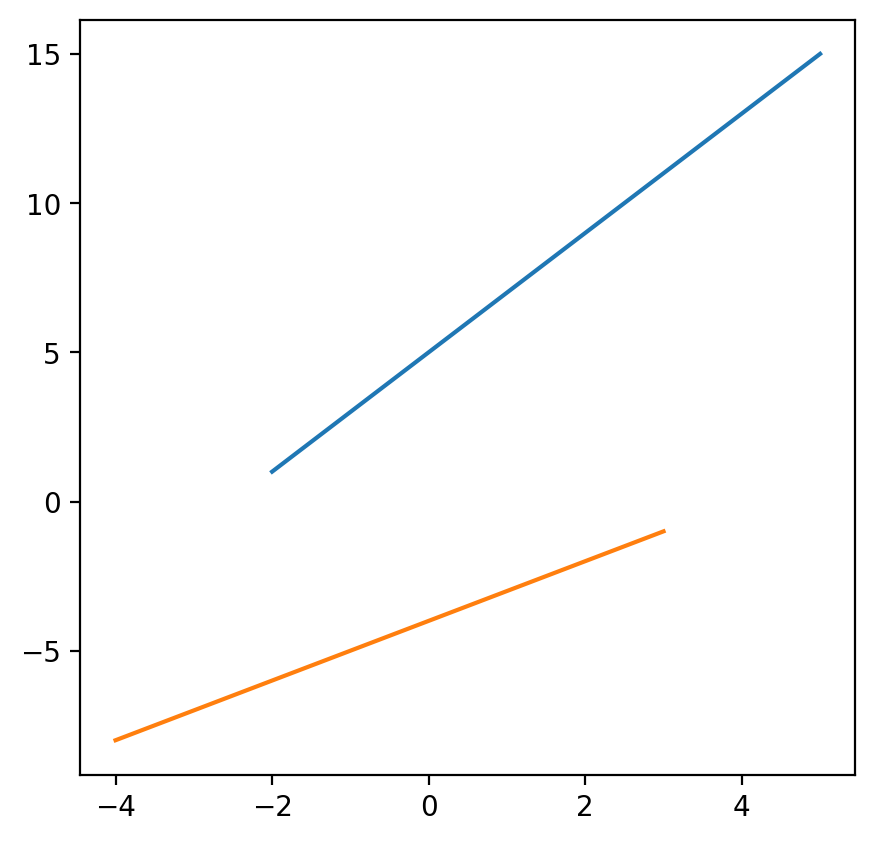

In [26]:
x1 = np.linspace(-2,5,50) ; y1 = x1 * 2 + 5
x1 = x1.reshape(50,1) ; y1 = np.array(y1) ; y1 = y1.reshape(50,1)

x2 = np.linspace(-4,3,50) ; y2 = x2 - 4 ; y2 = np.array(y2)
x2 = x2.reshape(50,1) ; y2 = np.array(y2) ; y2 = y2.reshape(50,1)

# Sides array
X1 = np.concatenate((x1,y1),axis=1)
X2 = np.concatenate((x2,y2),axis=1)

# Ploting
plt.plot(X1[:,0],X1[:,1])
plt.plot(X2[:,0],X2[:,1])
plt.show()

#### 2.2.2 Interpolation spline cubique
Par la suite, nous réalisons l'interpolation spline cubique qui sera stocker dans les variables d'instances $top$ et $bottom$. Pour comparer les résultats de l'interpolation avec les points originels, les points seront calculer en utilisant la fonction renvoyée par l'interpolation :

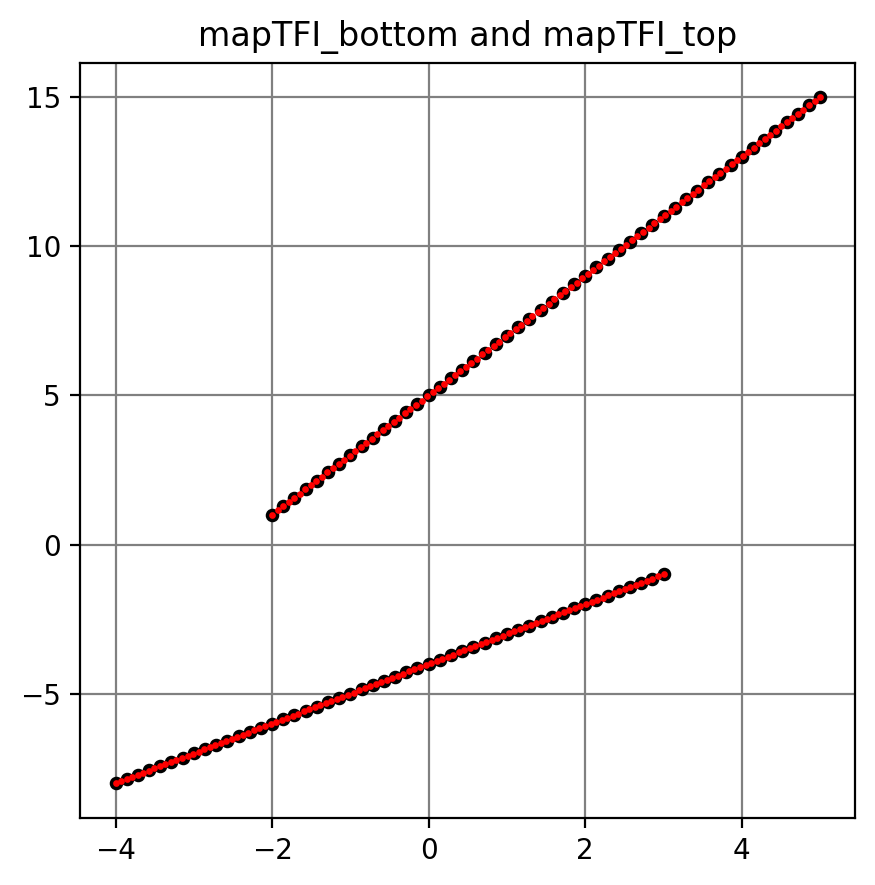

In [27]:
# Cubic Spline interpolation
top = CubicSplines_d(M=X1.copy())
bottom = CubicSplines_d(M=X2.copy())

# Interpolation points
splineX1 = top.f(np.linspace(0,1,100))
splineX2 = bottom.f(np.linspace(0,1,100))

# Ploting to compare both
plt.grid(b=True, color='grey',zorder=1)
splinePlot(X=X1,MM=splineX1,show=False)
splinePlot(X=X2,MM=splineX2,title='mapTFI_bottom and mapTFI_top')

Ci-dessus, nos deux bords avec en noir les points renseignés et en rouge les points de l'interpolation.

Puisque nous avons notre interpolation, nous créons des fonctions définissant chaque bord à notre disposition :

In [28]:
# mapTFI_top
def mapTFI_top(x):
    return top.f(x)

# mapTFI_bottom
def mapTFI_bottom(x):
    return bottom.f(x)

#### 2.2.3 Création du maillage à partir de ces interpolations
Une fois ces fonctions obtenues, le maillage peut être créer à l'aide de la classe << MeshPhys >> et << Mesh >> :

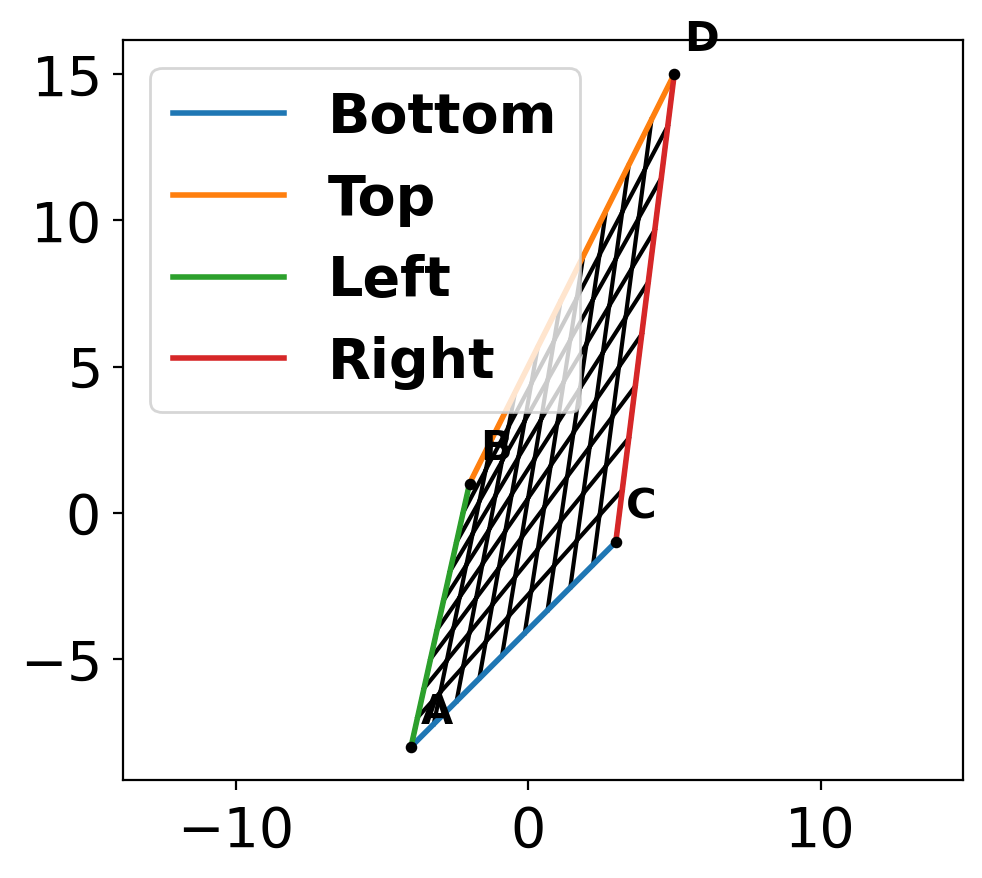

In [29]:
n = 10 ; m = 10
# TFI_2D and CPU Mesh
AA = MeshPhys(mapTFI_top=mapTFI_top,mapTFI_bottom=mapTFI_bottom)

# Physical Mesh build and plot
X = AA.buildMesh(n=n,m=m)
    # Plot sides
AA.borderPlot(show=False)
    # Plot interior points and lines
mesh = MeshPlot(X=X, n=n, m=m,
                nodes=False, nodesNames=False,
                elementsNames=False, edgesNames=False)

Voici donc finalement le maillage obtenu par la méthode d'interpolation transfinite 2D. Nous pouvons observer que notre maillage est correct puisqu'aucune ligne ne se superpose et la forme générale est bonne, ainsi ce maillage est réussi.

#### 2.2.4 Problème de la méthode
Mais cette interpolation peut être incorrect, un exemple détaillé est présenté dans le Notebook "exemple". Les résultats de ce maillage sont les suivants pour $n=30$ et $m=20$ :
<p><img src="https://raw.githubusercontent.com/SirDoggyJvla/stageL3/main/mesh6.30.20.png" 
        alt="Maillage d'une surface possédant des bords complexes avec une précision de n=30, m=20"
        title="Figure du maillage complexe pour une précision de n=30, m=20"
        width = 500
        ></p>
        
Au premier coup d'œil, le maillage semble correct mais en réalisant un zoom sur la partie autour du coin A, nous pouvons remarquer un problème majeur :
<p><img src="https://raw.githubusercontent.com/SirDoggyJvla/stageL3/main/mesh3.30.20.png" 
        alt="Zoom sur le coin A du maillage d'une surface possédant des bords complexes avec une précision de n=30, m=20"
        title="Figure du zoom sur le coin A maillage complexe pour une précision de n=30, m=20"
        width = 500
        ></p>

Nous pouvons déjà observer que des lignes passent en dessous du bord inférieur AC en bleu, mais en augmentant la précision à $n=100$ et $m=100$ et en zoomant légèrement nous pouvons aussi remarquer que les lignes se superposent entre elles, ce qui signifie que cela n'est pas une erreur des points d'interpolation : 
<p><img src="https://raw.githubusercontent.com/SirDoggyJvla/stageL3/main/mesh5.100.100.png" 
        alt="Zoom sur le coin A du maillage d'une surface possédant des bords complexes avec une précision de n=100, m=100"
        title="Figure du zoom sur le coin A maillage complexe pour une précision de n=100, m=100"
        width = 500
        ></p>
        
Pour utiliser cette méthode de maillage sur des surfaces complexes, il serait important de corriger ce problème.

### 2.3 Fonctionnement spécifique de << MeshPhys >>
#### 2.3.1 Initialisation
Précédemment, nous avons détaillé la réalisation d'un maillage physique pour un cas simple et dans cette partie nous allons voir comment fonctionne plus spécifiquement la classe << MeshPhys >>.

Cette partie du programme est composé de la fonction permettant d'obtenir les points du maillage physique en fonction des coordonnées fournies (c'est-à-dire les coordonnées du maillage de référence) ainsi que des conditions aux limites (aka Boundary Conditions BC) que sont les bords $top$, $bottom$, $left$ et $right$.

Un minimum de 2 conditions aux limites doivent être fourni comme expliqué plus au dessus. La classe détermine les coordonnées des coins du maillage ABCD en utilisant les conditions aux limites définies. Sur notre exemple précédent, cela signifie que le programme note les résultats des fonctions $mapTFI$_$...$ pour $x=0$ et $x=1$, correspondant à des coordonnées de coins.

L'utilisation générale de la classe est la suivante une fois avoir défini les bords comme dans la partie 2.2.2 avec l'interpolation des splines cubiques. Ici nous reprennons les bords précédent $top$ et $bottom$ et définissons $left$ et $right$ sur $None$, la valeur par défaut des $mapTFI$_$...$ :

In [30]:
physicalMesh = MeshPhys(mapTFI_bottom=mapTFI_bottom,mapTFI_top=mapTFI_top)

#### 2.3.2 Fonction du maillage physique
La fonction $meshPhys(XX)$ permet de réaliser l'interpolation transfinite 2D sur un maillage de référence avec $XX$ les coordonnées des points, une matrice de taille $(N,2)$ et $XX[:,0]$, la première colonne de la matrice, correspondant aux coordonnées $\xi$ et $XX[:,1]$, la seconde colonne de la matrice, correspondant aux coordonnées $\eta$.

Le résultat de cette fonction est une matrice de taille $N$ suivant les règles des matrices de coordonnées $X_{ref}$, et les coordonnées $x$, $y$ respectivement la première colonne et seconde colonne.

Ainsi, pour notre exemple $n=5$ et $m=4$ avec les bords de la partie précédente, la fonction est la suivante :

In [31]:
ref = MeshCPU(n=5,m=4)
physicalMesh.meshPhys(XX=ref.export_X_ref())

array([[-4.        , -8.        ],
       [-2.25      , -6.25      ],
       [-0.5       , -4.5       ],
       [ 1.25      , -2.75      ],
       [ 3.        , -1.        ],
       [-3.33333333, -5.        ],
       [-1.58333333, -2.66666667],
       [ 0.16666667, -0.33333333],
       [ 1.91666667,  2.        ],
       [ 3.66666667,  4.33333333],
       [-2.66666667, -2.        ],
       [-0.91666667,  0.91666667],
       [ 0.83333333,  3.83333333],
       [ 2.58333333,  6.75      ],
       [ 4.33333333,  9.66666667],
       [-2.        ,  1.        ],
       [-0.25      ,  4.5       ],
       [ 1.5       ,  8.        ],
       [ 3.25      , 11.5       ],
       [ 5.        , 15.        ]])

Une fois ces résultats obtenus, il est possible de tracer le graphique du maillage en utilisant la fonction détaillé dans la partie 2.4.

#### 2.3.3 Représentation graphique des bordures
La fonction $plot()$ de la classe $MeshPhys$ permet de tracer les bordures sur un graphique. Trois entrées optionnelles sont disponible pour cette fonction :
<ul>
    <li> Le nombre de points composant les représentation des bords $top$ et $bottom$ : $nx$ (par défaut: $100$)    </li>
    <li> Le nombre de points composant les représentation des bords $left$ et $right$ : $ny$ (par défaut: $100$)    </li>
    <li> L'épaisseur des points de la bordure : $s$ (par défaut: $10$)                                              </li>
    <li> L'épaisseur des bordures : $lw$ (par défaut: $2$)                                                          </li>
    <li> Afficher le graphique une fois les opérations terminés ou le garder actif afin de rajouter manuellement des éléments à l'aide d'autres fonctions : $show$ (par défaut: $True$)                                                  </li>
    <li> Initialisation du graphique permettant d'avoir un affichage correct et uniforme des axes (distances égale selon x et y) : $init$ (par défaut: $True$)                                                                                 </li>
    <li> Affiché les lettres des coins : $corners=True$ (par défaut: $True$)                                        </li>
    <li> Affiché en couleur les borders : $borders=True$ (par défaut: $True$)                                       </li>
    <li> Affiché la légende des couleurs des bordures (uniquement si les bords sont affichés) : $legend=True$ (par défaut: $True$)                                                                                                             </li>
</ul>

Le résultat de la fonction sur le maillage précédent est le suivant (à noter que cette fonction est indépendante de $meshPhys$) :

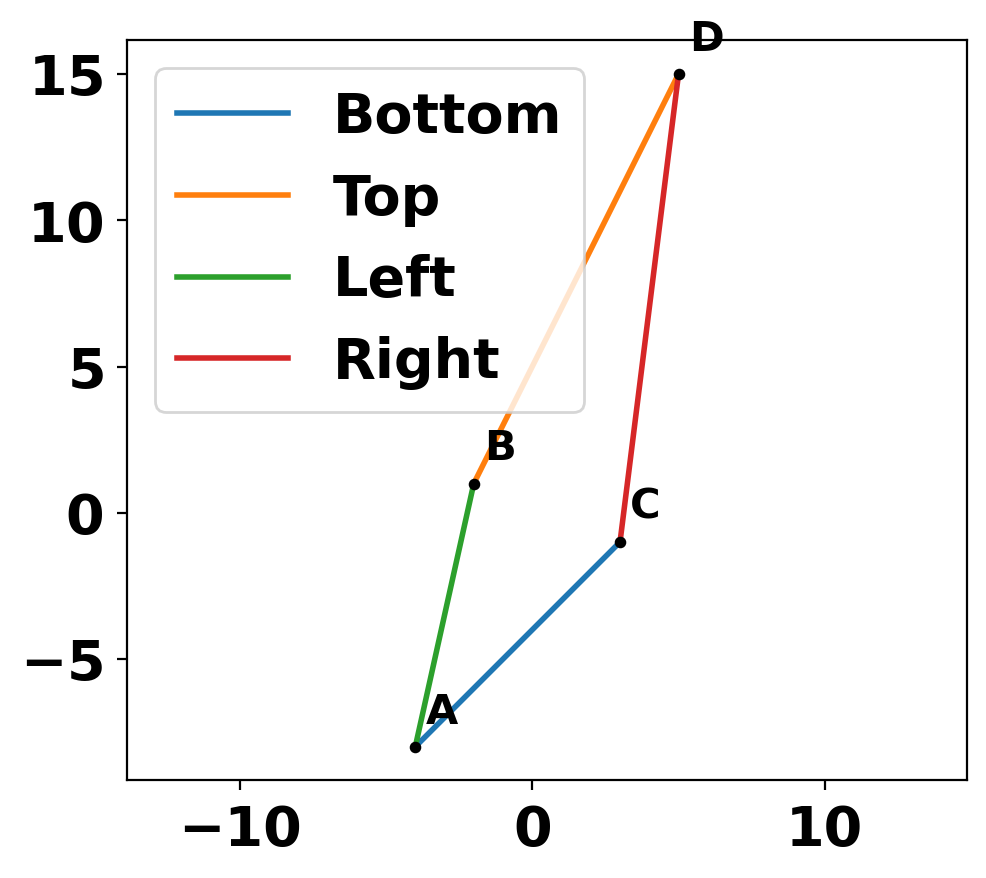

In [32]:
physicalMesh.borderPlot()

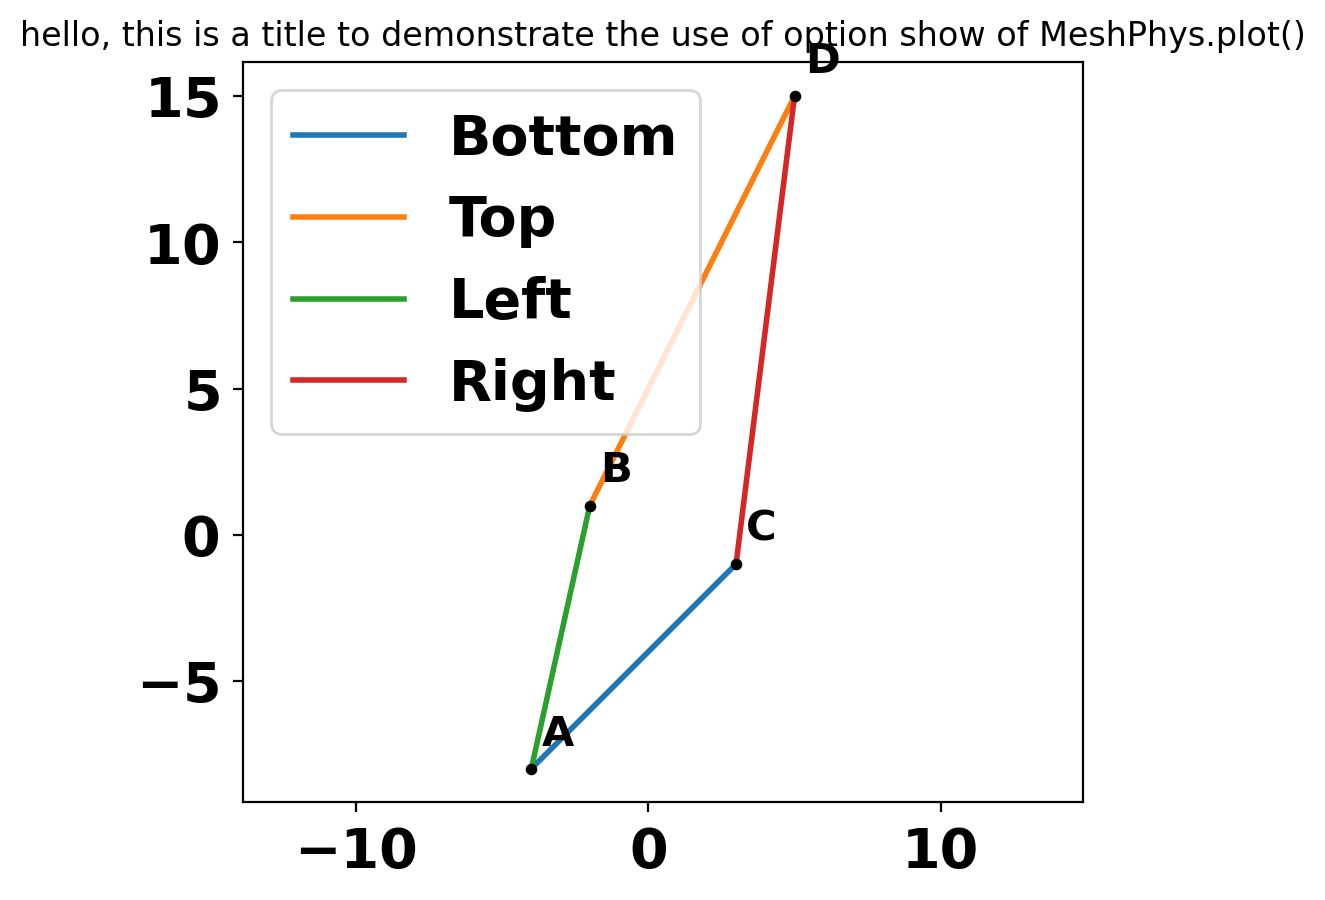

In [33]:
physicalMesh.borderPlot(show=False)
plt.title("hello, this is a title to demonstrate the use of option show of MeshPhys.plot()")
plt.show()

#### 2.4.2 Construction du maillage physique
La construction du maillage physique, une fois avoir renseigner les bords nécessaires à sa construction, utilise la fonction $buildMesh$.

Cette fonction nécessite l'utilisation de la classe << MeshPhys >> et de sa fonction $meshPhys$ mais cela peut aussi être une fonction créer par l'utilisateur du moment qu'elle respecte la syntaxe utilisée au sein de $buildMesh$.

En reprenant les bords précédent, son utilisation est la suivante :

In [34]:
physicalMesh.buildMesh(n=n,m=m)

array([[-4.00000000e+00, -8.00000000e+00],
       [-3.22222222e+00, -7.22222222e+00],
       [-2.44444444e+00, -6.44444444e+00],
       [-1.66666667e+00, -5.66666667e+00],
       [-8.88888889e-01, -4.88888889e+00],
       [-1.11111111e-01, -4.11111111e+00],
       [ 6.66666667e-01, -3.33333333e+00],
       [ 1.44444444e+00, -2.55555556e+00],
       [ 2.22222222e+00, -1.77777778e+00],
       [ 3.00000000e+00, -1.00000000e+00],
       [-3.77777778e+00, -7.00000000e+00],
       [-3.00000000e+00, -6.13580247e+00],
       [-2.22222222e+00, -5.27160494e+00],
       [-1.44444444e+00, -4.40740741e+00],
       [-6.66666667e-01, -3.54320988e+00],
       [ 1.11111111e-01, -2.67901235e+00],
       [ 8.88888889e-01, -1.81481481e+00],
       [ 1.66666667e+00, -9.50617284e-01],
       [ 2.44444444e+00, -8.64197531e-02],
       [ 3.22222222e+00,  7.77777778e-01],
       [-3.55555556e+00, -6.00000000e+00],
       [-2.77777778e+00, -5.04938272e+00],
       [-2.00000000e+00, -4.09876543e+00],
       [-1.

La commande nous renvoie la matrice des coordonnées $(x,y)$ de chaque point du maillage physique sous la forme d'une matrice, tout comme le maillage de référence.

#### 2.3.4 Autres fonctions
La fonction export_corners() permet d'obtenir les coordonnées des coins A, B, C et D.

In [35]:
physicalMesh.export_corners()

array([[-4., -8.],
       [-2.,  1.],
       [ 3., -1.],
       [ 5., 15.]])

### 2.4 Fonctionnement spécifique de << MeshPlot >>
#### 2.4.1 Initialisation
Cette classe a pour unique but de réaliser l'affichage graphique des coordonnées et maillages renseignés en entrée. Plusieurs entrées à renseignées obligatoirement existent :
<ul>
    <li> Coordonnées des points sous forme de matrice $(N,2)$ : $X=$              </li>
    <li> Propriété de la matrice $n$ : $n=$                                       </li>
    <li> Propriété de la matrice $m$ : $m=$                                       </li>
</ul>

Il existe aussi des entrées optionnels permettant de manipuler ce qui doit être afficher sur le graphique :
<ul>
    <li> Affiché les nœuds (croix rouges) : $nodes=True$              </li>
    <li> Affiché les numéros des nœuds : $nodesNames=True$            </li>
    <li> Affiché les numéros des éléments : $elementsNames=True$      </li>
    <li> Affiché les lignes horizontales : $edgesHorizontal=True$     </li>
    <li> Affiché les lignes verticales : $edgesVertical=True$         </li>
    <li> Affiché les numéros des lignes : $edgesNames=True$           </li>
</ul>

Par défaut, toutes ces options sont activé ($True$) mais il est possible de choisir de ne pas faire apparaître certains corps sur le graphique.

#### 2.4.2 Exemples
Ci-dessous se trouve l'exemple de maillage physique de la partie 2.2 avec l'utilisation de l'affichage graphique des résultats :

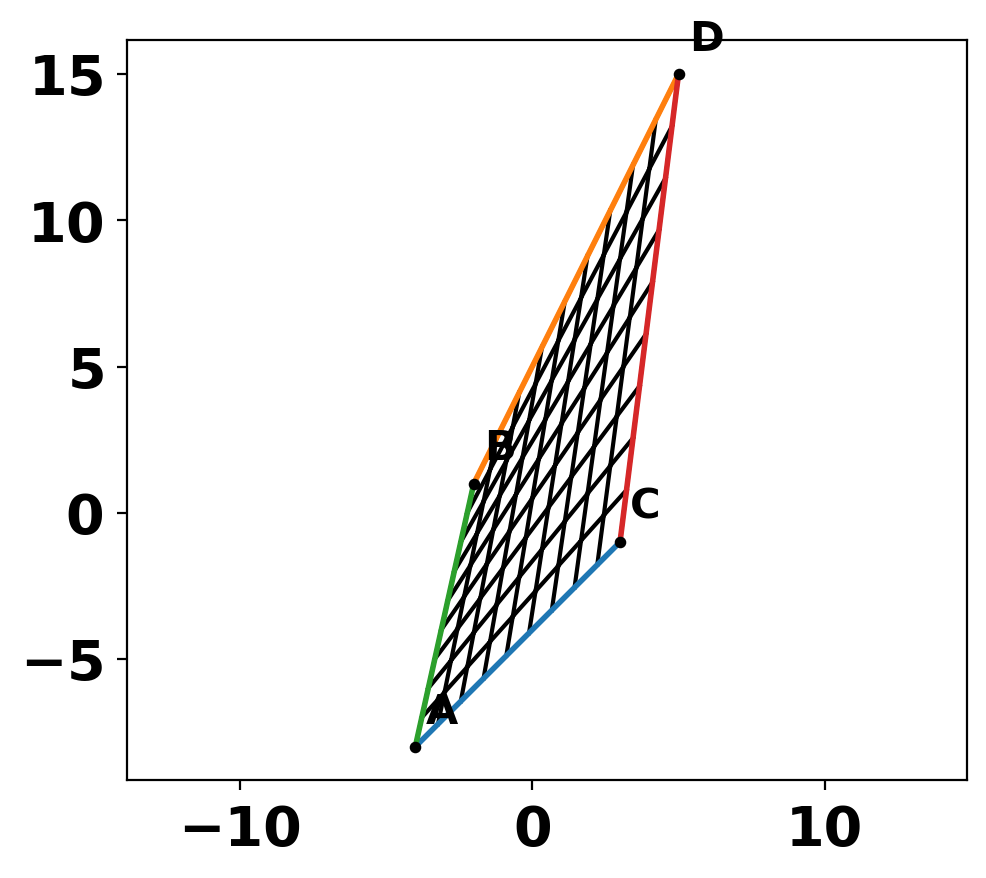

In [36]:
n = 10 ; m =10
ref = MeshCPU(n=n,m=m)

X = physicalMesh.meshPhys(XX=ref.export_X_ref())

physicalMesh.borderPlot(show=False, legend=False)
mesh = MeshPlot(X=X, n=n, m=m,
                nodes=False, nodesNames=False,
                elementsNames=False,edgesNames=False)

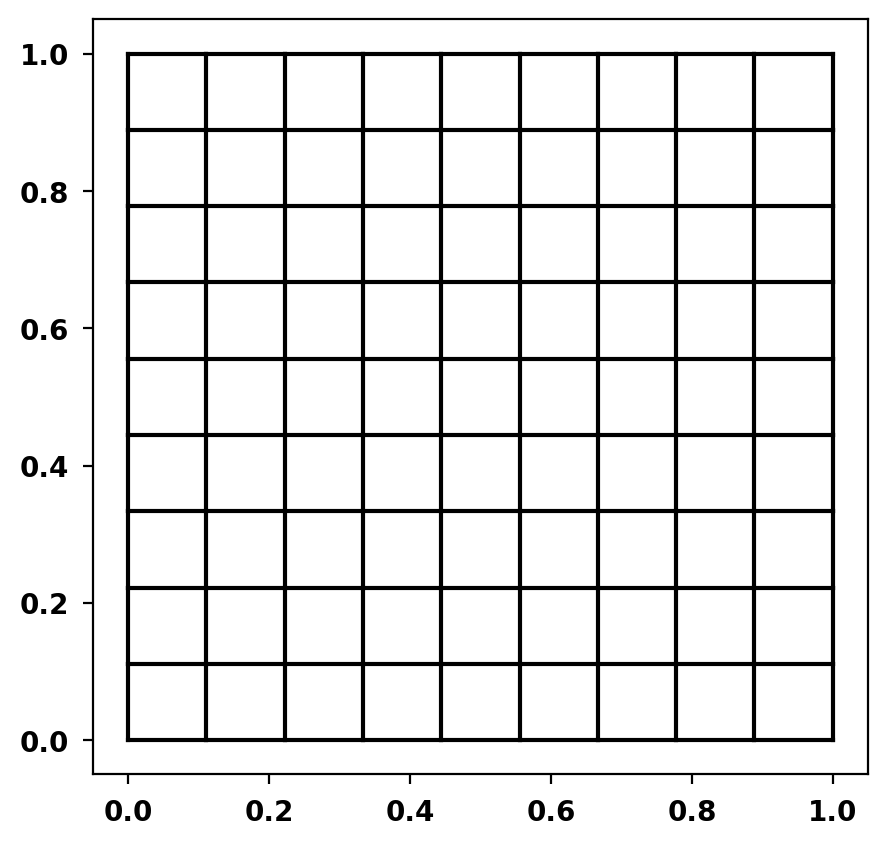

In [37]:
n = 10 ; m =10
ref = MeshCPU(n=n,m=m)
mesh = MeshPlot(X=ref.export_X_ref(), n=n, m=m,
                nodes=False, nodesNames=False,
                elementsNames=False,edgesNames=False)

## 3 Exportation des résultats pour exploitation
### 3.1 Initialisation
Finalement, le programme a la possibilité d'exporter des fichiers sous différents formats : ".su2", ".msh", ".vtk". La classe << Export >> réalise cette tâche avec comme entrées à renseigner les suivantes :
<ul>
    <li> Les points à exporter : $X=$      </li>
    <li> La propriété $n$ : $n=$           </li>
    <li> La propriété $m$ : $m=$           </li>
</ul>

### 3.2 Fonction d'exportation
Une fois avoir initialiser la classe avec les informations nécessaires à l'exportation des résultats, il est possible d'utiliser la commande $exportFile(inputs)$ avec comme entrées :
<ul>
    <li> Le format d'exportation : $format=$ (3 choix: 'su2', 'msh', 'vtk')        </li>
    <li> Le nom du fichier : $filename=$     (par défaut: "mesh")                  </li>
</ul>

### 3.3 Utilisation de ces fichiers
Ces format de fichier de maillage sont utilisé dans de nombreux logiciels, il est notamment possible d'utiliser les fichiers ".msh" et ".vtk" dans le logiciel GMSH. En prenant une exportation des résultats des maillages physiques de l'exemple 2.3 du Notebook << exemples >>, et en ouvrant le fichier dans le logiciel, nous obtenons les résultats suivants pour le format ".msh" :
<p><img src="https://raw.githubusercontent.com/SirDoggyJvla/stageL3/main/msh.png" 
        alt="Maillage sous GMSH au format .msh"
        title="Figure du maillage complexe pour une précision de n=30, m=20 sous GMSH"
        width = 500
        ></p>
        
Puis pour le format ".vtk" :
<p><img src="https://raw.githubusercontent.com/SirDoggyJvla/stageL3/main/vtk.png" 
        alt="Maillage sous GMSH au format .vtk"
        title="Figure du maillage complexe pour une précision de n=30, m=20 sous GMSH"
        width = 500
        ></p>
        
Ainsi à l'aide de cette commande d'exportation des résultats dans des fichiers, il serait possible de construire le maillage sous Python puis de l'étudier dans un logiciel adapté.